# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q3.ipynb`.

In [1]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

In [2]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [3]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [4]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [5]:
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


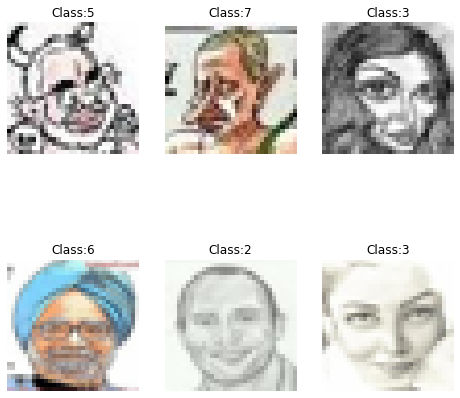

In [6]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [7]:
#Normalize the array
def norm(data):
    return np.array((data - np.min(data)) / (np.max(data) - np.min(data)))

In [8]:
#Flattening the images
def flatten(X):
    temp=X
    return temp.reshape(X.shape[0],np.prod(X.shape[1:]))
X=flatten(X)

In [9]:
# write function
def gen_eigen(data):
    cov_matrix=np.cov(data.T)
    eig_val,eig_vector=np.linalg.eig(cov_matrix)
    eig_val=eig_val.real
    eig_vector=eig_vector.real
    # indx = np.argsort(eig_val)[::-1]
    # sorted_eig_val = eig_val[indx]
    # sorted_eig_vector = eig_vector[:,indx]
    return eig_val,eig_vector
eig_val,eig_vector=gen_eigen(X)

In [10]:
eig_val=eig_val.real
eig_vector=eig_vector.real
eig_vector.shape

(3072, 3072)

In [11]:
print(eig_val)
print(eig_vector)

[ 8.05321772e+01  1.99819287e+01  1.29505097e+01 ...  1.06800933e-17
  1.84989782e-17 -2.97848357e-18]
[[-2.29262301e-02 -2.28110757e-02 -3.62126864e-03 ...  4.13558015e-03
   2.10999305e-04 -3.03624349e-03]
 [-2.39795545e-02 -2.51962301e-02 -6.27780476e-03 ...  3.94518748e-04
   1.16528264e-04 -1.94895207e-04]
 [-2.49314471e-02 -2.34632581e-02 -9.36172255e-03 ... -2.31302582e-04
  -8.54726184e-04 -4.93779469e-05]
 ...
 [-2.01824285e-02 -1.02655501e-02 -2.08673808e-02 ...  6.59312026e-03
  -1.27303799e-03 -1.80855000e-03]
 [-2.05962277e-02 -1.33415732e-02 -2.75640239e-02 ... -9.98710239e-03
  -9.87130324e-03  5.84792750e-03]
 [-2.16924564e-02 -1.29333625e-02 -2.93959031e-02 ...  1.51526766e-02
   2.52131982e-02  1.01527609e-02]]


#### Compute eigen values and plot eigen value spectrum

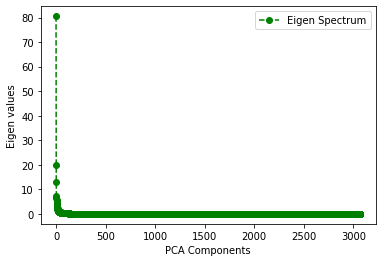

In [12]:
# eigen values and spectrum
plt.xlabel("PCA Components")
plt.ylabel("Eigen values")
plt.plot(range(0,len(eig_val)), eig_val, color='g',label = "Eigen Spectrum",marker='o',linestyle='--')
plt.legend()
plt.show()

#### Plot the percentage of variances vs the number of principal components

[ 33.62119361  41.96340312  47.37008165 ... 100.         100.
 100.        ]


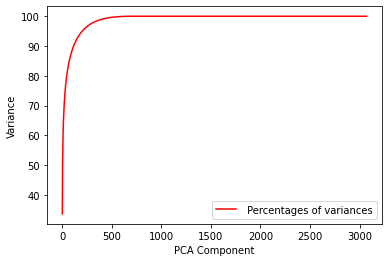

In [13]:
# plot variance vs components
components=range(1,len(eig_val)+1)
var_explained=[]
for i in eig_val:
  var_explained.append(100*(i/np.sum(eig_val)))
cum_variance=np.cumsum(var_explained)
print(cum_variance)
plt.xlabel("PCA Component")
plt.ylabel("Variance")
# plot lines
plt.plot(components, cum_variance, color='r',label = " Percentages of variances")
plt.legend()
plt.show()

#### Visualize eigen faces(eigen vectors)

In [14]:
"""
Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)
"""
def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

"""
"""

'\n'

[4, 4, 6, 5, 11]


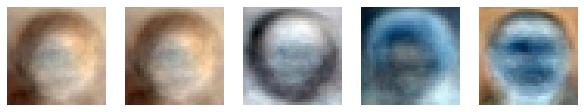

In [15]:
indices = [randrange(12)+1 for i in range(5)]
print(indices)
plot(eig_vector,H,W,C, indices)

#### Reconstruction 

In [16]:
# reconstruction
n_components = 300
eigenvector_subset = eig_vector[:,0:n_components]
x_reduced = np.dot(X,eigenvector_subset)
res= np.matmul(eigenvector_subset,x_reduced.T)
res.shape
res=res.real

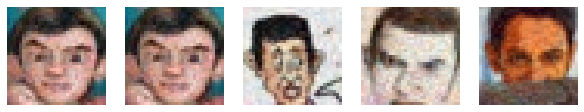

In [17]:
# plot data in 2D
plot(res,H,W,C, indices)

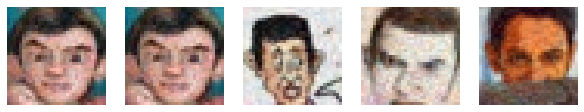

In [18]:
#Making custom PCA
def custom_PCA(data,n_components):
    eig_val,eig_vector=gen_eigen(data)
    eigenvector_subset = eig_vector[:,0:n_components]
    x_reduced = np.dot(eigenvector_subset.T,data.T).T
    return x_reduced,eigenvector_subset
#Api to reconstruct the image
def reconstruct(data,eig_val,eig_vector,n_components):
    eigenvector_subset = eig_vector[:,0:n_components]
    x_reduced = np.dot(eigenvector_subset.T,data.T).T
    temp = np.matmul(eigenvector_subset,x_reduced.T)
    temp.shape
    temp=temp.real
    return temp.T
plot(reconstruct(X,eig_val,eig_vector,300).T,H,W,C, indices)

#### Plot data in 2D

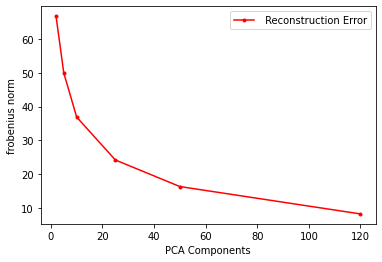

In [24]:
#Finding the error for each component
pca_comp=[2,5,10,25,50,120]
errors=[]
origin_images=X
for i in pca_comp:
  reconstruct_images=reconstruct(data=origin_images,eig_val=eig_val,eig_vector=eig_vector,n_components=i)
  #errors.append(np.linalg.norm(origin_images-reconstruct_images, 'fro'))
  errors.append(np.linalg.norm(origin_images, 'fro')-(np.linalg.norm(reconstruct_images, 'fro')))
plt.xlabel("PCA Components")
plt.ylabel("frobenius norm")
plt.plot(pca_comp, errors, marker='.', color='r',label = " Reconstruction Error")
plt.legend()
plt.show()

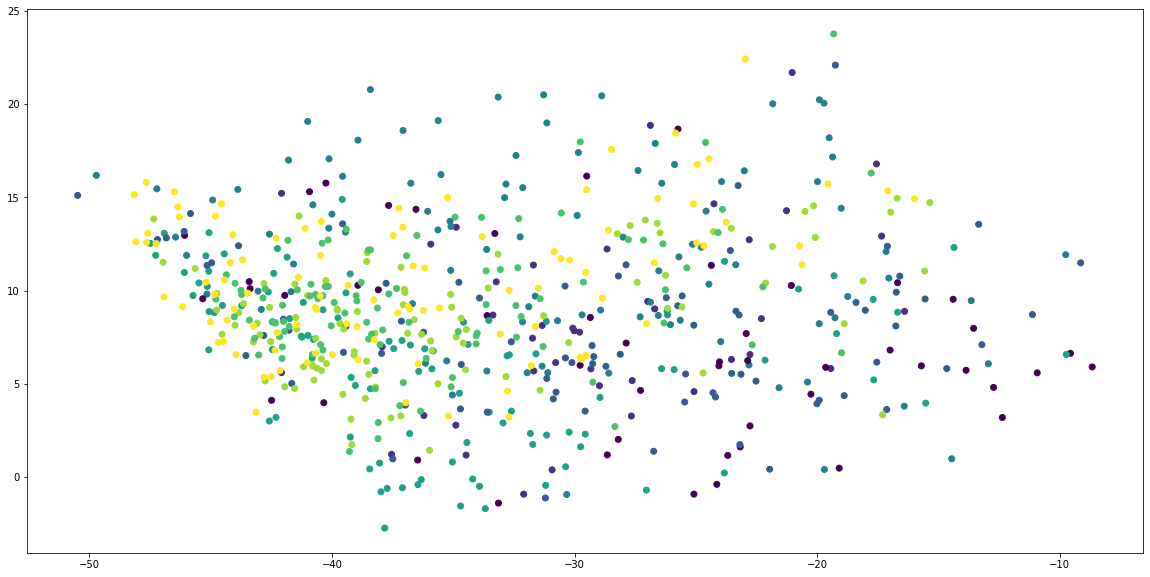

In [25]:
# #plot
# n_components=2
eigenvector_subset = eig_vector[:,0:n_components]
x_reduced = np.dot(eigenvector_subset.T,X.T).T
# eigenvector_subset = eig_vector[:,0:n_components]
# image_projection=np.matmul(X,eigenvector_subset)
# pca_datapoints = np.matmul(eigenvector_subset,image_projection.T).T
plt.figure(figsize=(20,10))
plt.scatter(x_reduced[:,0], x_reduced[:,1],c=y)
plt.show()

## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [21]:
# Load data again
X,y = load_data(dirpath)
X=flatten(X)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


In [22]:
reverse_classes = {val: key for key, val in cfw_dict.items()}
reverse_classes

{0: 'Amitabhbachan',
 1: 'AamirKhan',
 2: 'DwayneJohnson',
 3: 'AishwaryaRai',
 4: 'BarackObama',
 5: 'NarendraModi',
 6: 'ManmohanSingh',
 7: 'VladimirPutin'}

#### Visualize dominant eigen faces of each of the classes

Amitabhbachan


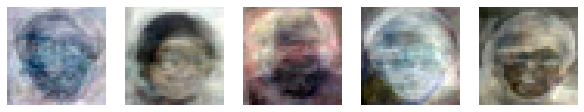

AamirKhan


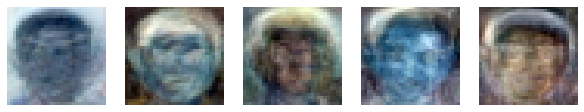

DwayneJohnson


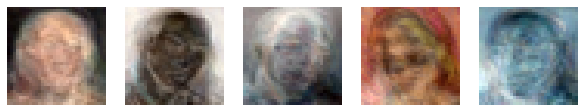

AishwaryaRai


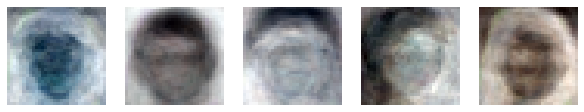

BarackObama


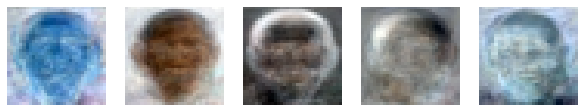

NarendraModi


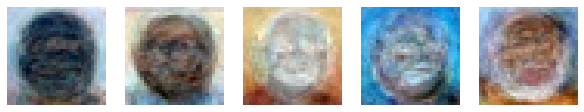

ManmohanSingh


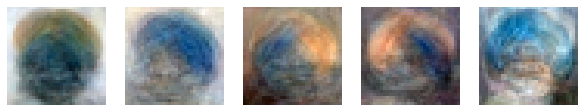

VladimirPutin


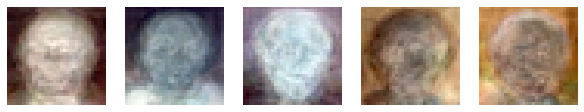

In [23]:
# visualize
#distribute data across classes
idx=[0,1,2,3,4]
eig_vec_class={}
eig_val_class={}
for i in range(8):
    flattened_img=X[y==i]
    c_eig_val,c_eig_vec=gen_eigen(flattened_img)
    eig_val_class[i]=c_eig_val
    eig_vec_class[i]=c_eig_vec
    print(reverse_classes[i])
    plot(c_eig_vec.real,H,W,C,idx)

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

Number of components required for entire dataset

In [24]:
# components required
print(f"Number of Principle Components required for reconstruction")
var_explained=[]
for i in eig_val:
  var_explained.append(100*(i/np.sum(eig_val)))
cum_variance=np.cumsum(var_explained)
for i in range(len(cum_variance)):
    if cum_variance[i] > 90:
        break
print(f"Entire Dataset = {i}")
for j in range(8):
  var_explained=[]
  for i in eig_val_class[j]:
    var_explained.append(100*(i/np.sum(eig_val_class[j])))
  cum_variance=np.cumsum(var_explained)
  for i in range(len(cum_variance)):
    if cum_variance[i] > 90:
      break
  print(f"{reverse_classes[j]} = {i}")

Number of Principle Components required for reconstruction
Entire Dataset = 114
Amitabhbachan = 20
AamirKhan = 23
DwayneJohnson = 27
AishwaryaRai = 35
BarackObama = 42
NarendraModi = 56
ManmohanSingh = 49
VladimirPutin = 43


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

The number of components differ for each class and do not match with the entire dataset. This is because each class has a different set of eigen values and eigen vectors. So when we try to retain more than 90% of the data, we observe that the variance distribution is different for each class as each image set corresponds to a different person, and hence the number of principal components needed are different.

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [25]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9604825562669912

In [26]:
# code here
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
def reduce(data,components):
    pca = PCA(n_components=components)
    p_components = pca.fit_transform(data)
    return p_components
def experiment(data,labels,components):
    red_data=reduce(data,components)
    X_train, X_test, y_train, y_test = train_test_split(red_data, labels, test_size=0.2, random_state=42)
    model=LinearRegression()
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)
experiment(X,label,2)

0.7000201318444801

In [51]:
# analysis / plot (split the cells if required)
components=range(1,201)
scores=[]
for i in components:
    score=experiment(X,label,i)
    scores.append(score)

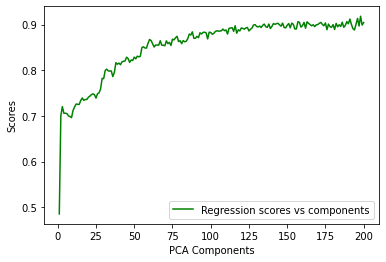

In [28]:
plt.xlabel("PCA Components")
plt.ylabel("Scores")
plt.plot(components, scores, color='g',label = "Regression scores vs components")
plt.legend()
plt.show()

From the above graph we can observe:
* With increase in the number of components our accuracy score is rising this is due to the fact that more components we take, the more variance we can retain.
* The first two components have a steep slope. This is because in Principal component analysis, we sort the components based on their eigen value, and most of the variance is retained in the first component and then the second and so on. With more components we see that the variance preserved decreases slowly.